In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [33]:
#Data collection
df = pd.read_csv(r"C:\Users\Muthu\Downloads\Employee-Attrition - Employee-Attrition.csv")


In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [41]:
df.shape

(1470, 35)

In [43]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [45]:
df.duplicated().sum()

0

In [47]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [49]:
df1 = df[df["Attrition"]=='Yes']
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [51]:
df2 = df[df["Attrition"]=='No']
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [53]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [55]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,...,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


C:\Users\Muthu\AppData\Local\Temp\ipykernel_8216\1729549085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="coolwarm")


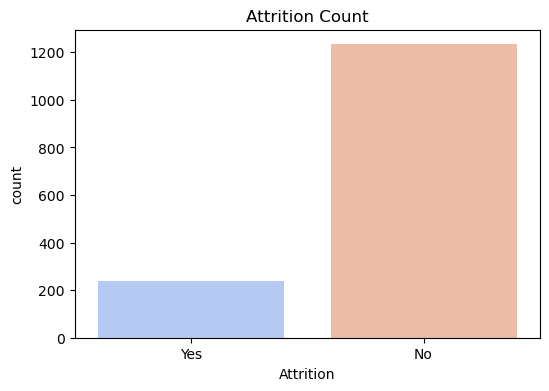

Attrition Rate:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [57]:
# check for attrition counts

plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df, palette="coolwarm")
plt.title("Attrition Count")
plt.show()

# Percentage of attrition
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
print("Attrition Rate:\n", attrition_rate)

<Figure size 1200x600 with 0 Axes>

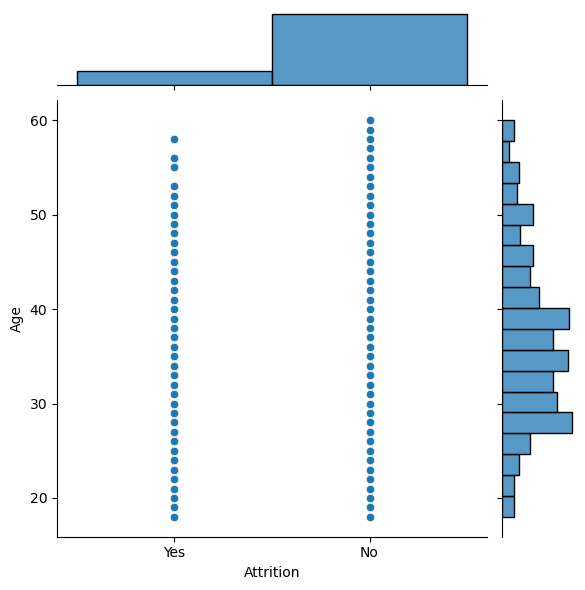

In [59]:
#Age Distribution
plt.figure(figsize=(12,6))
sns.jointplot(x="Attrition",y='Age', data=df, palette="coolwarm")

plt.show()

C:\Users\Muthu\AppData\Local\Temp\ipykernel_8216\2511082196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="coolwarm")


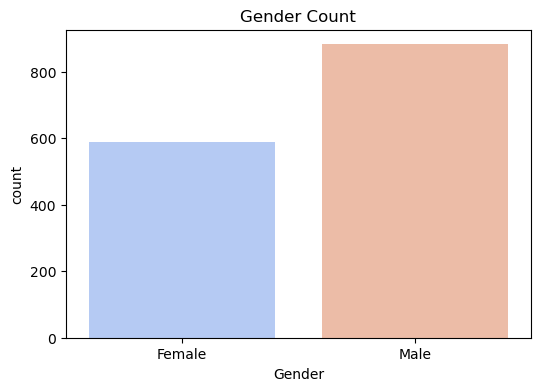

In [61]:
# check for gender counts
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="coolwarm")
plt.title("Gender Count")
plt.show()

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

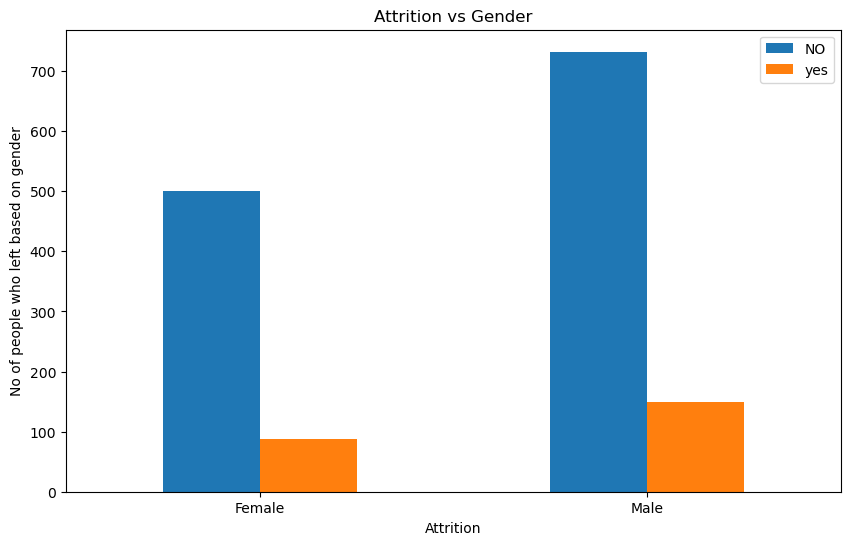

In [63]:
#Create a plot for crosstab

pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["NO","yes"])
plt.xticks(rotation=0)

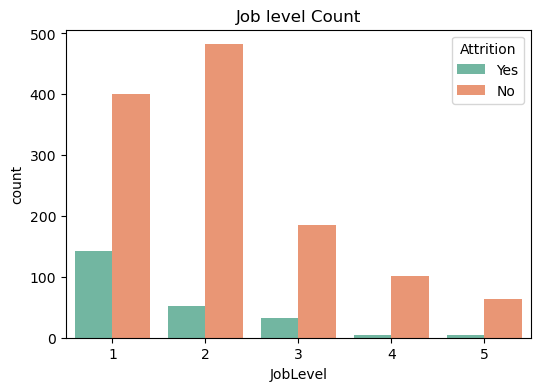

In [65]:
# check for gender counts
plt.figure(figsize=(6,4))
sns.countplot(x="JobLevel",hue='Attrition' ,data=df, palette="Set2")
plt.title("Job level Count")
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

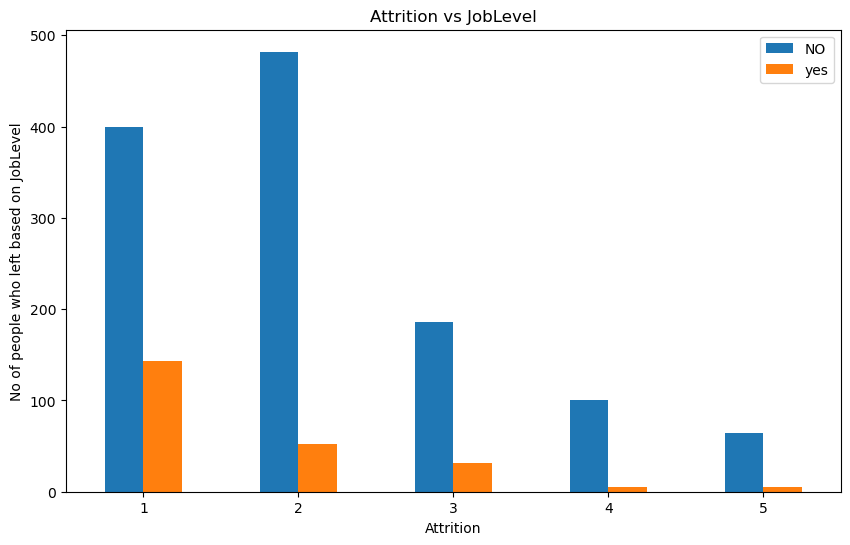

In [67]:
#Create a plot for crosstab

pd.crosstab(df['JobLevel'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs JobLevel")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on JobLevel")
plt.legend(["NO","yes"])
plt.xticks(rotation=0)


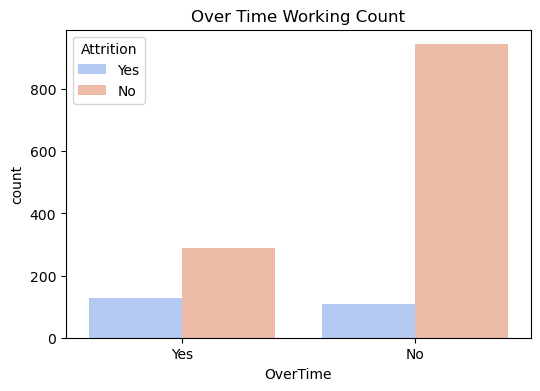

In [69]:
#overtime working
plt.figure(figsize=(6,4))
sns.countplot(x="OverTime",hue='Attrition', data=df, palette="coolwarm")
plt.title("Over Time Working Count")
plt.show()

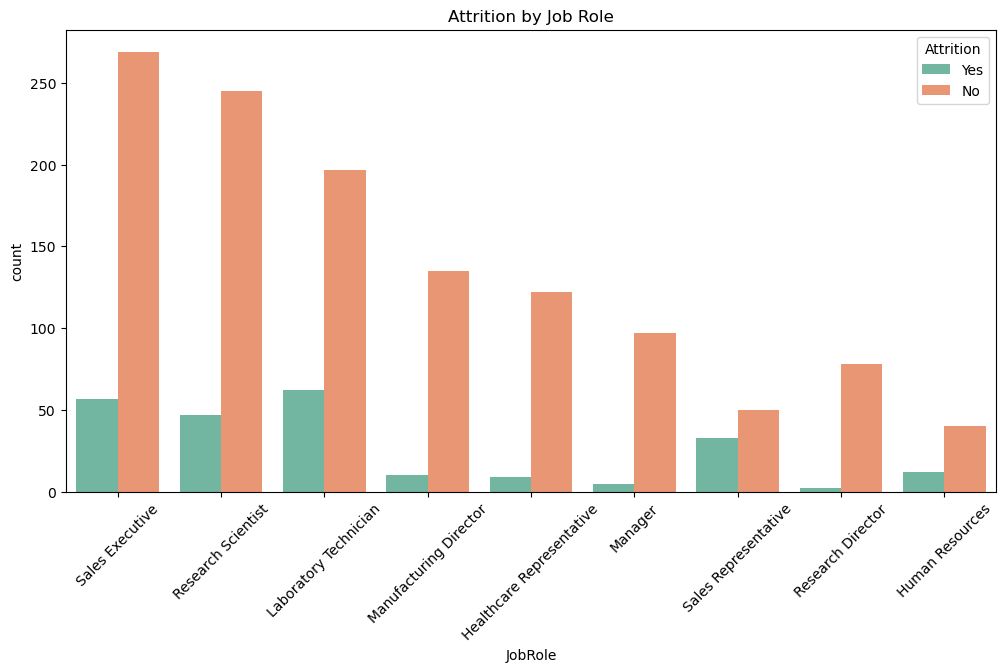

In [71]:
#Attrition vs Job Role
plt.figure(figsize=(12,6))
sns.countplot(x="JobRole", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

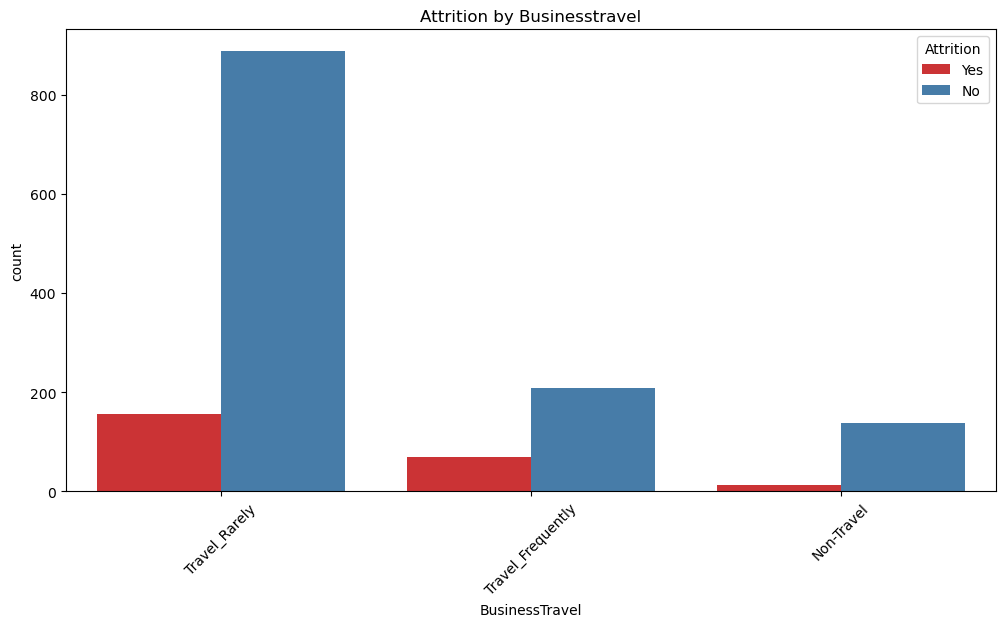

In [73]:
#Attrition vs Business Travel
plt.figure(figsize=(12,6))
sns.countplot(x="BusinessTravel", hue="Attrition", data=df, palette="Set1")
plt.xticks(rotation=45)
plt.title("Attrition by Businesstravel")
plt.show()

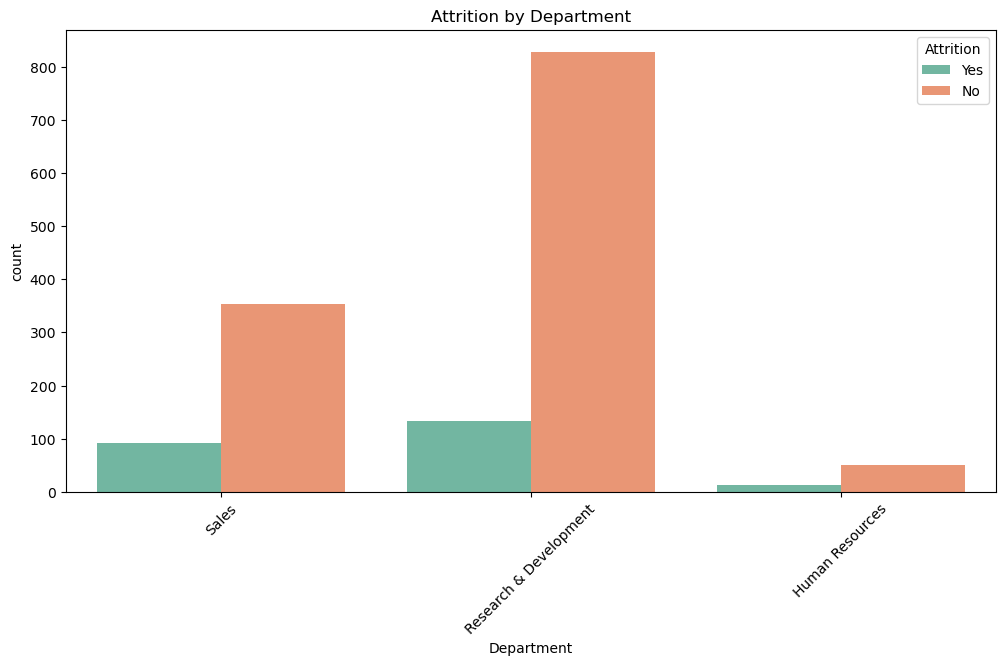

In [75]:
#Attrition vs Department
plt.figure(figsize=(12,6))
sns.countplot(x="Department",hue="Attrition",data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Department")
plt.show()


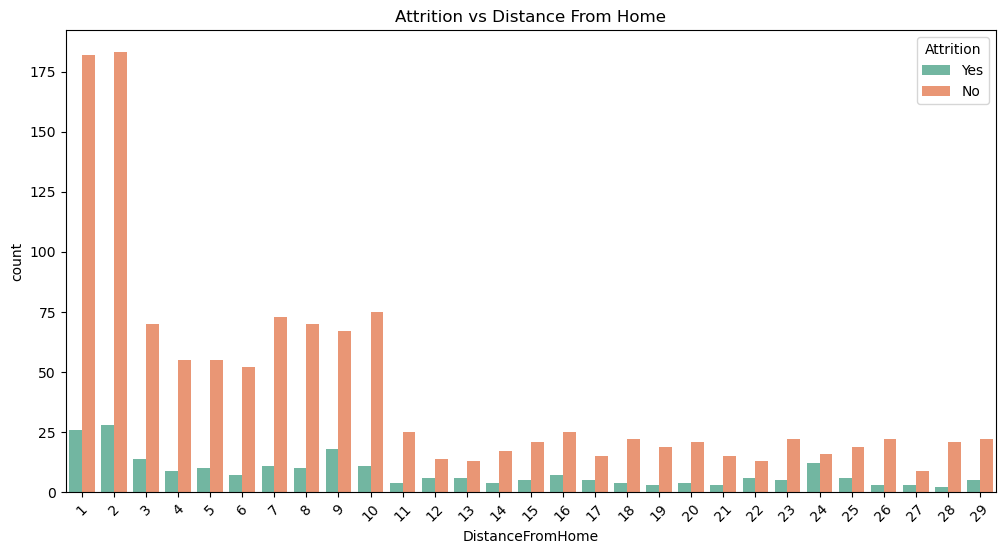

In [77]:
#Attrition vs Distance from home
plt.figure(figsize=(12,6))
sns.countplot(x="DistanceFromHome", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition vs Distance From Home")
plt.show()

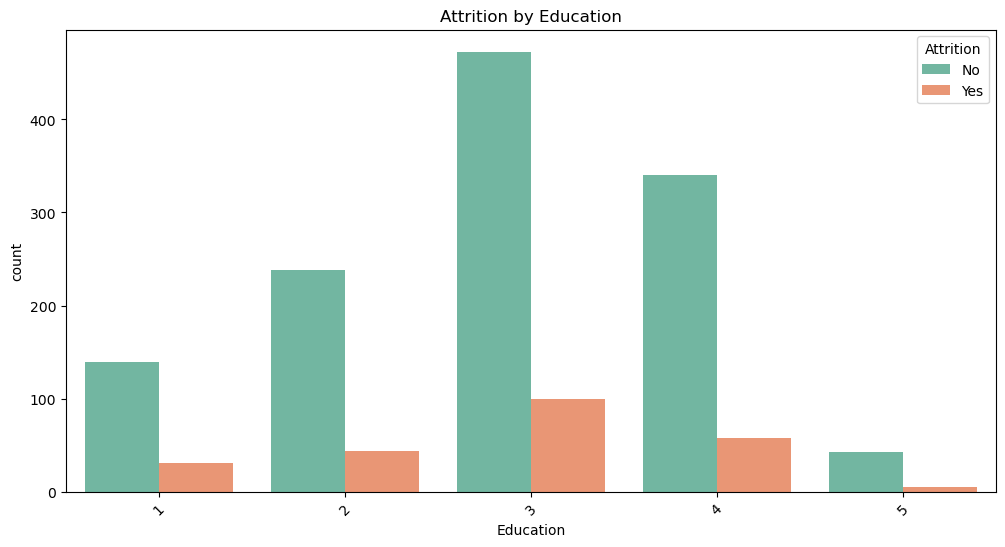

In [79]:
#Attrition vs Education
plt.figure(figsize=(12,6))
sns.countplot(x="Education", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Education")
plt.show()

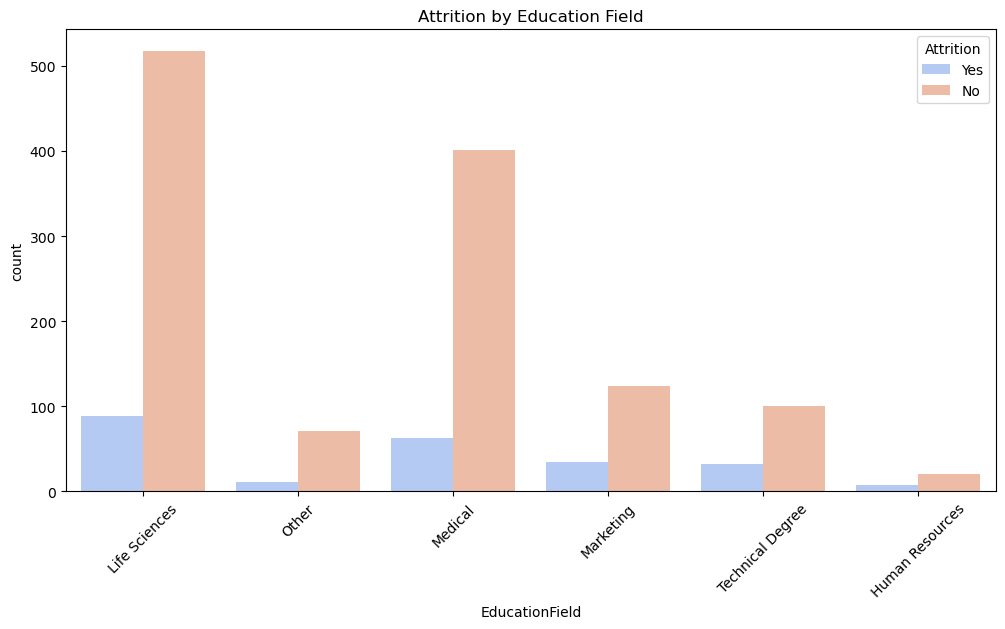

In [81]:
#Attrition vs Education
plt.figure(figsize=(12,6))
sns.countplot(x="EducationField", hue="Attrition", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Attrition by Education Field")
plt.show()

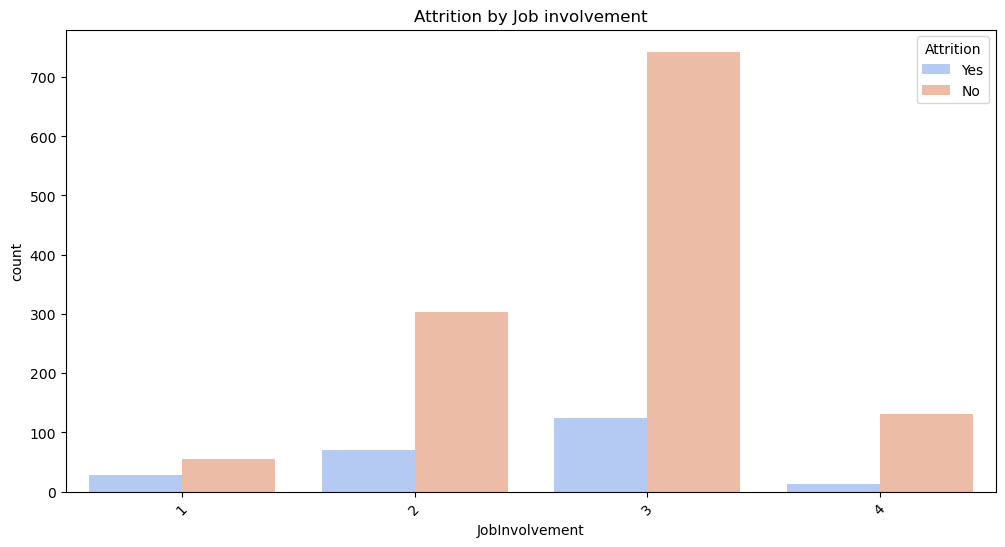

In [83]:
#Attrition vs Job involvement
plt.figure(figsize=(12,6))
sns.countplot(x="JobInvolvement", hue="Attrition", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Attrition by Job involvement")
plt.show()

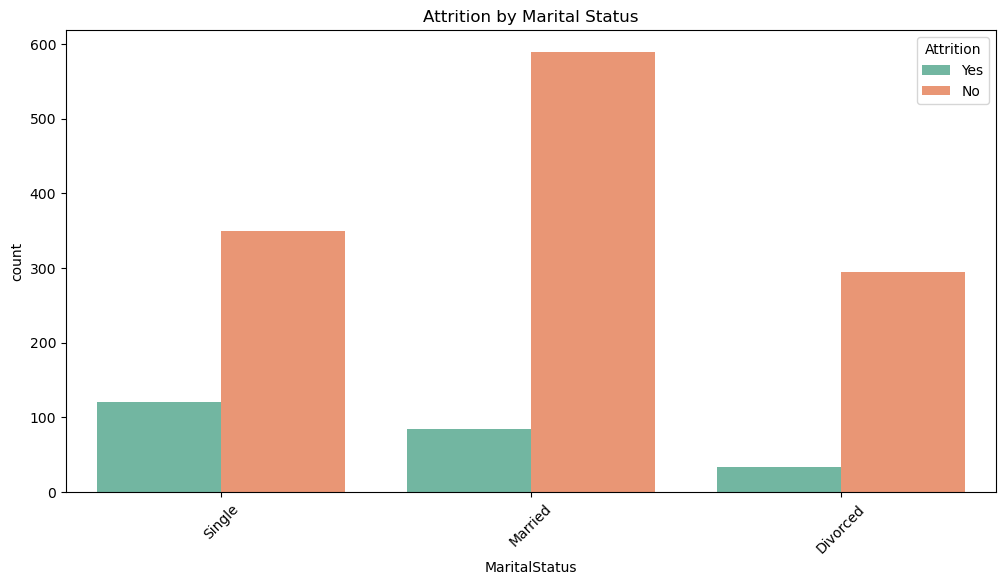

In [85]:
#Attrition vs Martial Status
plt.figure(figsize=(12,6))
sns.countplot(x="MaritalStatus", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Marital Status")
plt.show()

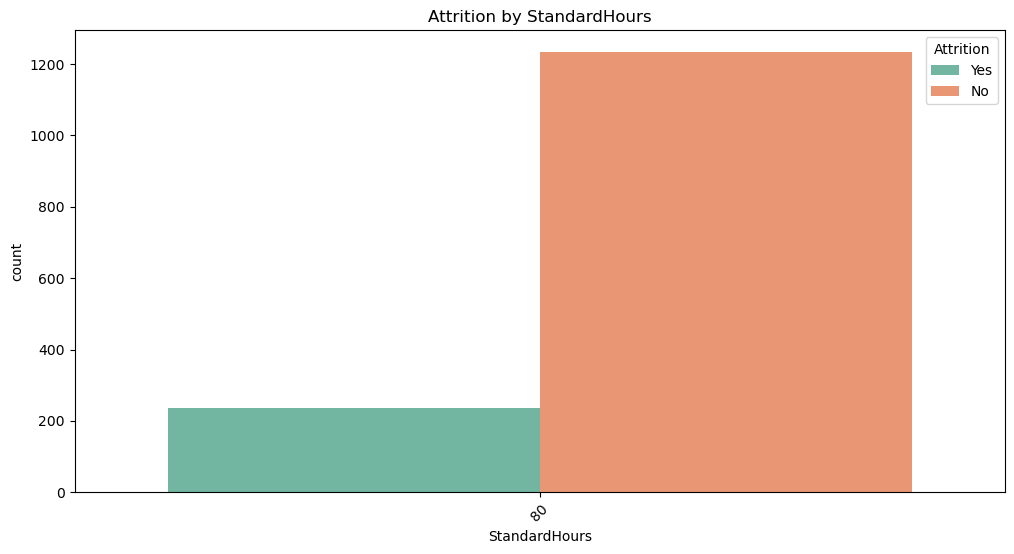

In [87]:
#Attrition vs monthlyrate
plt.figure(figsize=(12,6))
sns.countplot(x="StandardHours", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by StandardHours")
plt.show()

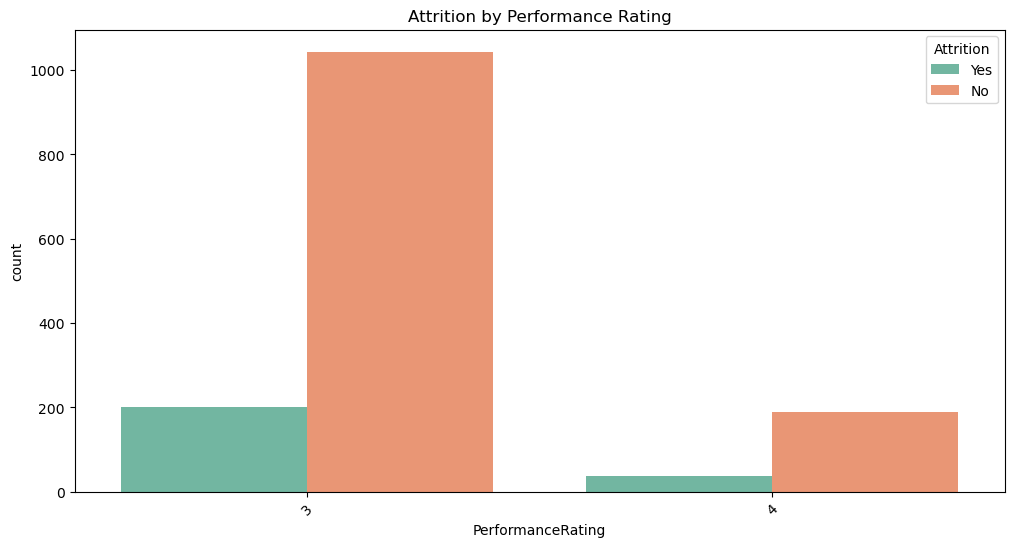

In [89]:
#Attrition vs PerformanceRating
plt.figure(figsize=(12,6))
sns.countplot(x="PerformanceRating", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Performance Rating")
plt.show()

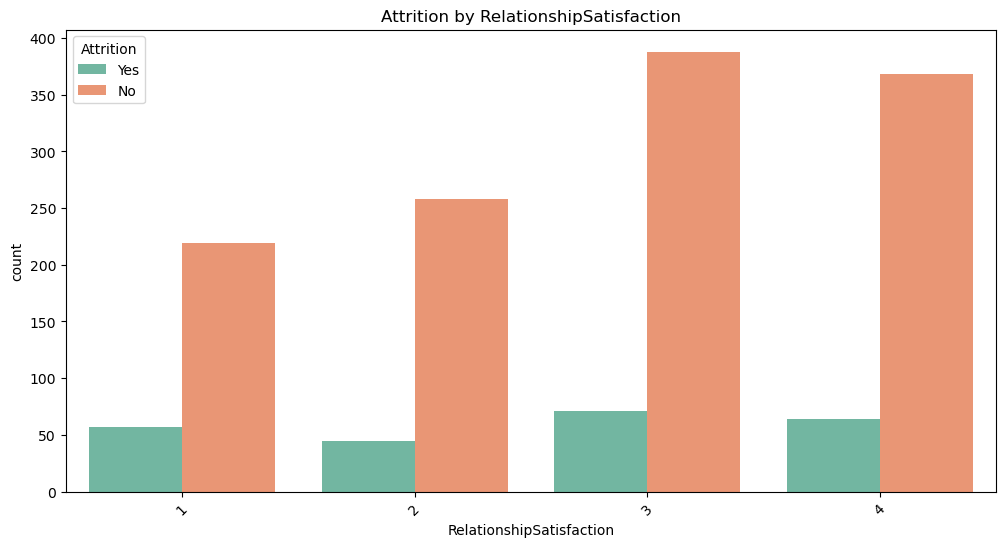

In [91]:
#Attrition vs Relationship Satisfaction
plt.figure(figsize=(12,6))
sns.countplot(x="RelationshipSatisfaction", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by RelationshipSatisfaction")
plt.show()

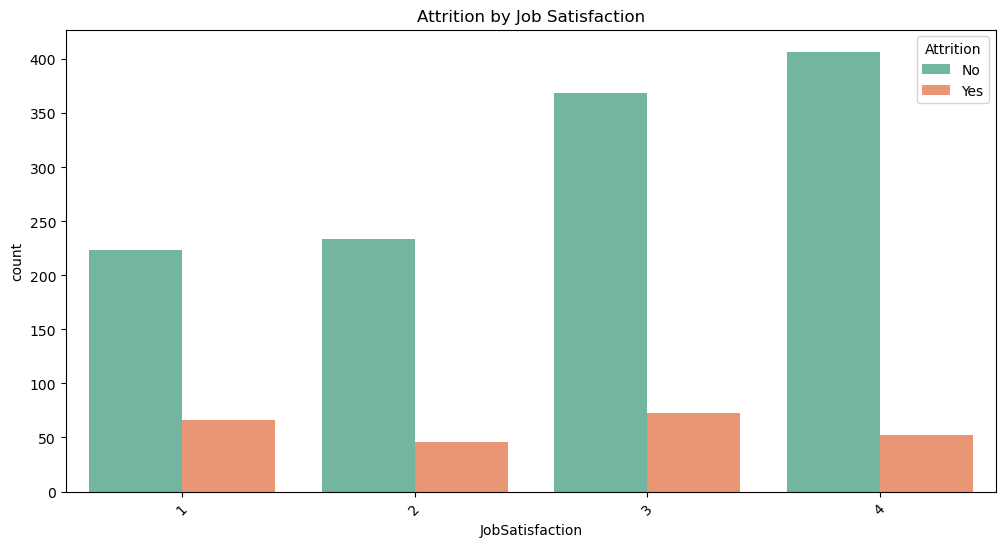

In [93]:
#Attrition vs Job satisfication
plt.figure(figsize=(12,6))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Job Satisfaction")
plt.show()

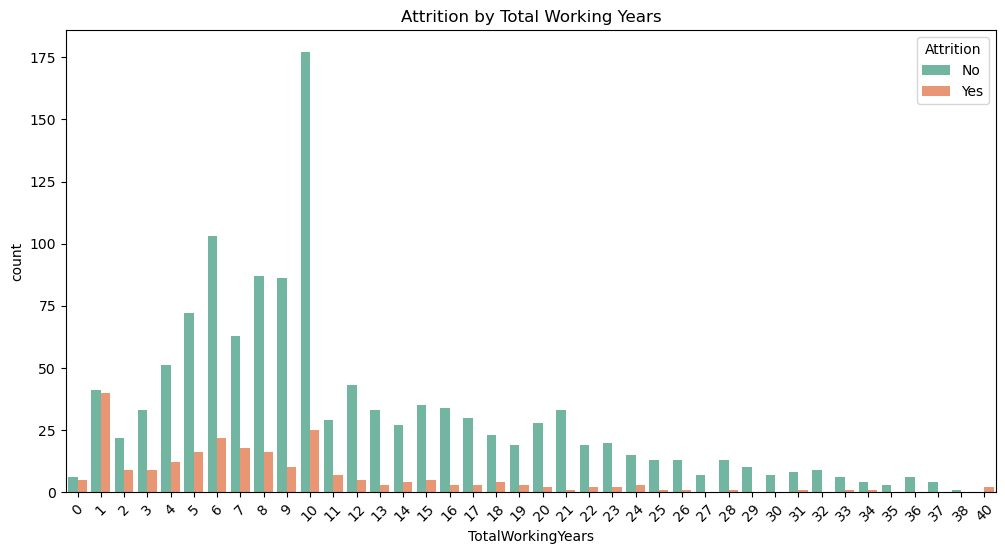

In [95]:
#Attrition vs TotalWorkingYears
plt.figure(figsize=(12,6))
sns.countplot(x="TotalWorkingYears", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Total Working Years")
plt.show()

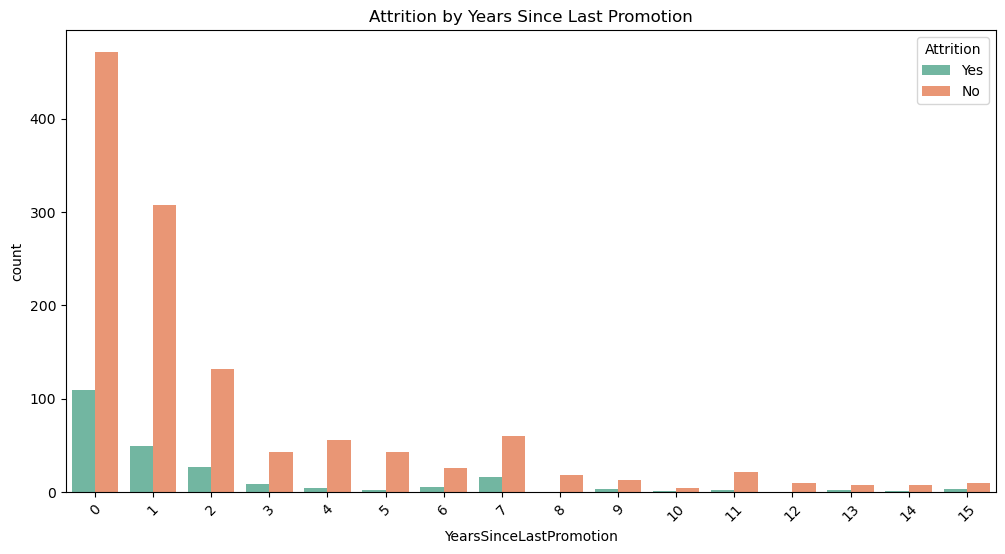

In [97]:
#Attrition vs TrainingTimesLastYear
plt.figure(figsize=(12,6))
sns.countplot(x="YearsSinceLastPromotion", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Years Since Last Promotion")
plt.show()

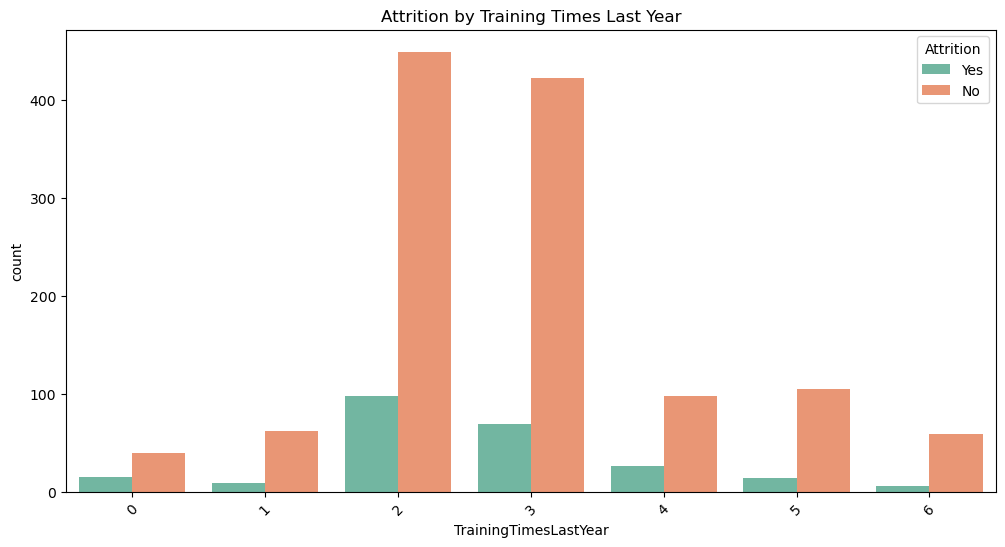

In [99]:
#Attrition vs TrainingTimesLastYear
plt.figure(figsize=(12,6))
sns.countplot(x="TrainingTimesLastYear", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Training Times Last Year")
plt.show()

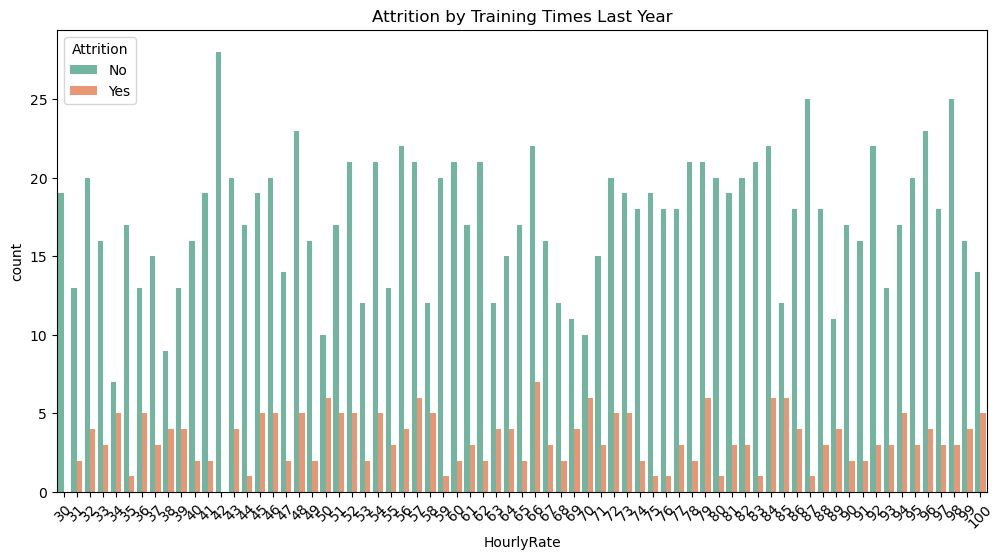

In [101]:
#Attrition vs Hourlyrate
plt.figure(figsize=(12,6))
sns.countplot(x="HourlyRate", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by Training Times Last Year")
plt.show()

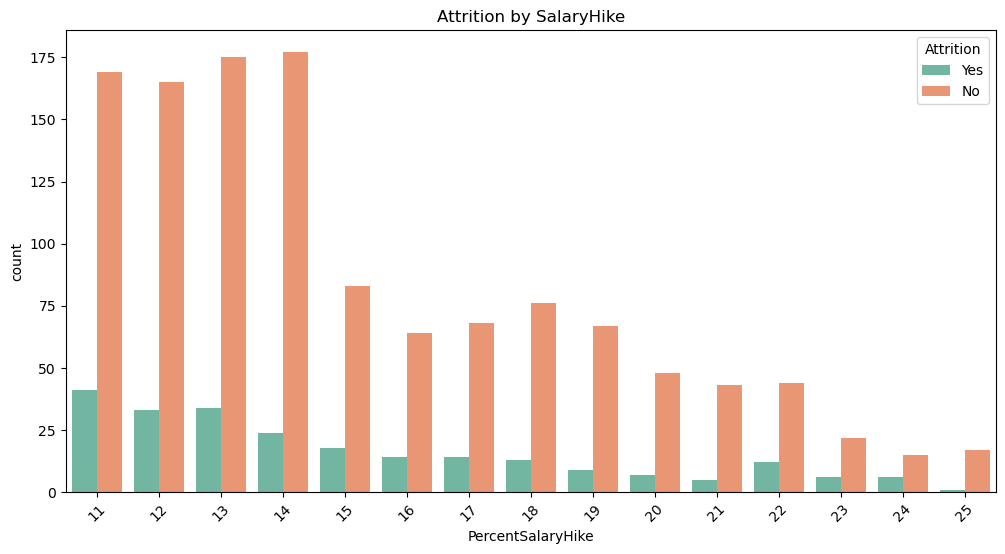

In [103]:
#Attrition vs SalaryHike
plt.figure(figsize=(12,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by SalaryHike")
plt.show()

C:\Users\Muthu\AppData\Local\Temp\ipykernel_8216\787563497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="MonthlyIncome", x="Attrition", data=df, palette="Set2")


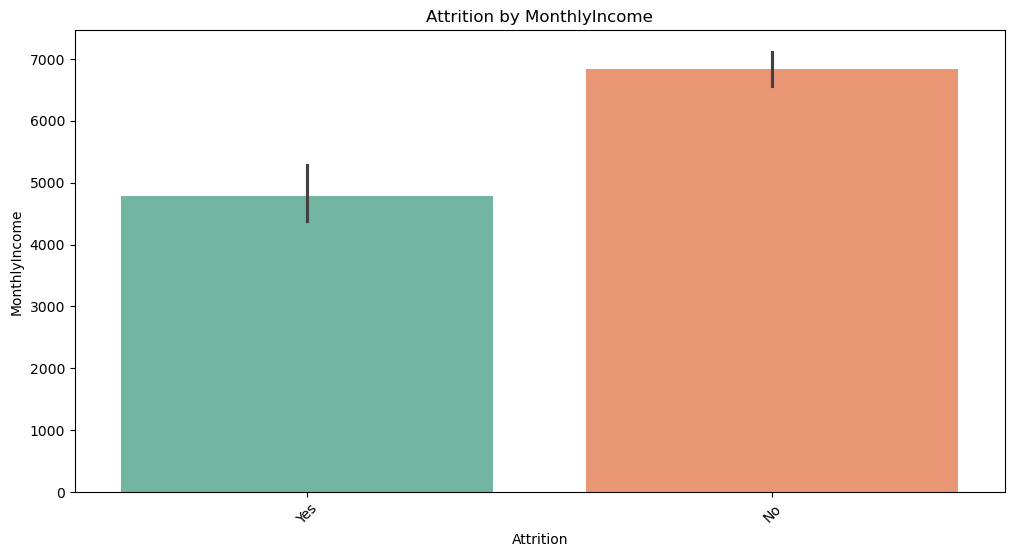

In [105]:
#Attrition vs monthlyIncome
plt.figure(figsize=(12,6))
sns.barplot(y="MonthlyIncome", x="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition by MonthlyIncome")
plt.show()

C:\Users\Muthu\AppData\Local\Temp\ipykernel_8216\1300916160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='YearsAtCompany', x="Attrition", data=df, palette="Set2")


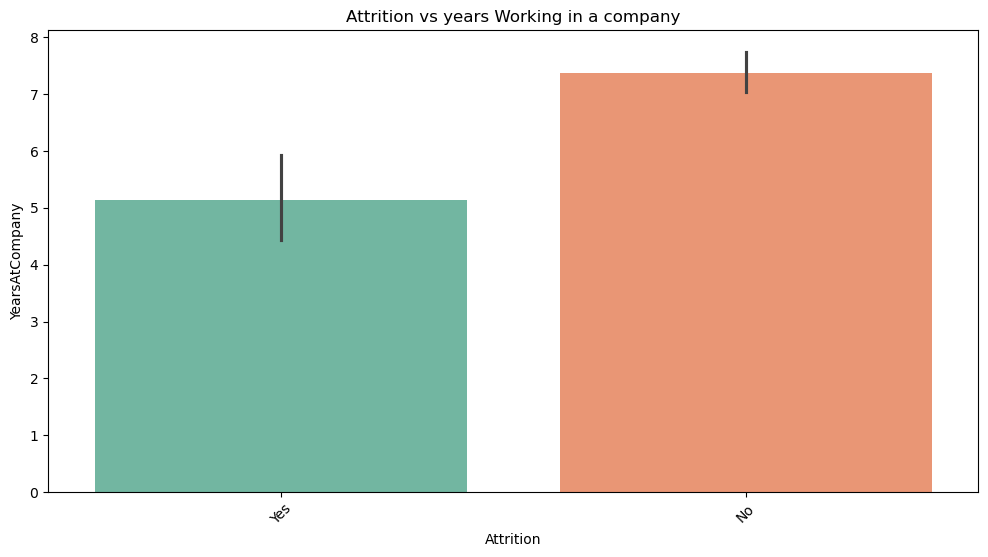

In [107]:
#Attrition vs Years working at a company
plt.figure(figsize=(12,6))
sns.barplot(y='YearsAtCompany', x="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition vs years Working in a company")
plt.show()

C:\Users\Muthu\AppData\Local\Temp\ipykernel_8216\321638137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='NumCompaniesWorked', x="Attrition", data=df, palette="Set2")


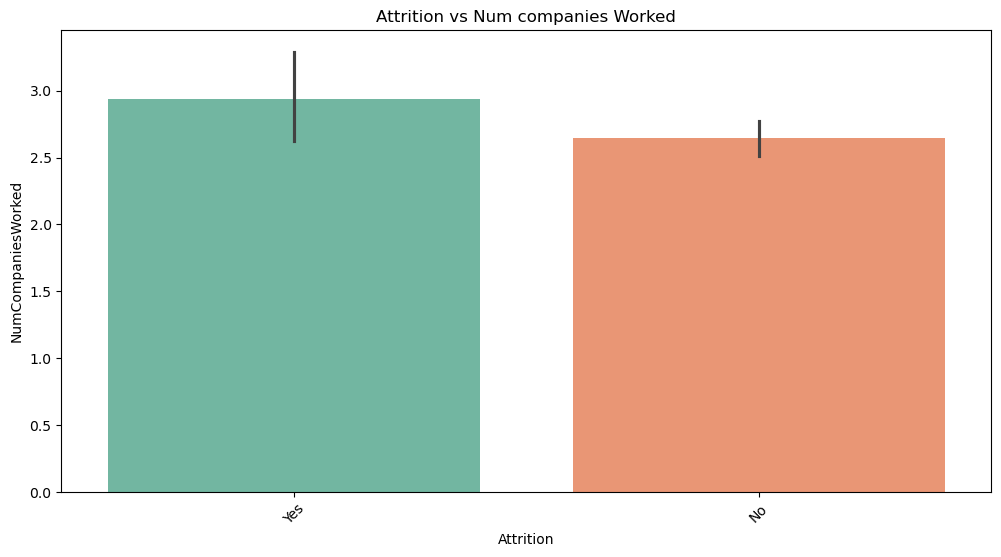

In [109]:
#Attrition vs Numm companies Worked
plt.figure(figsize=(12,6))
sns.barplot(y='NumCompaniesWorked', x="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition vs Num companies Worked")
plt.show()

C:\Users\Muthu\AppData\Local\Temp\ipykernel_8216\812263790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='YearsWithCurrManager', x="Attrition", data=df, palette="Set2")


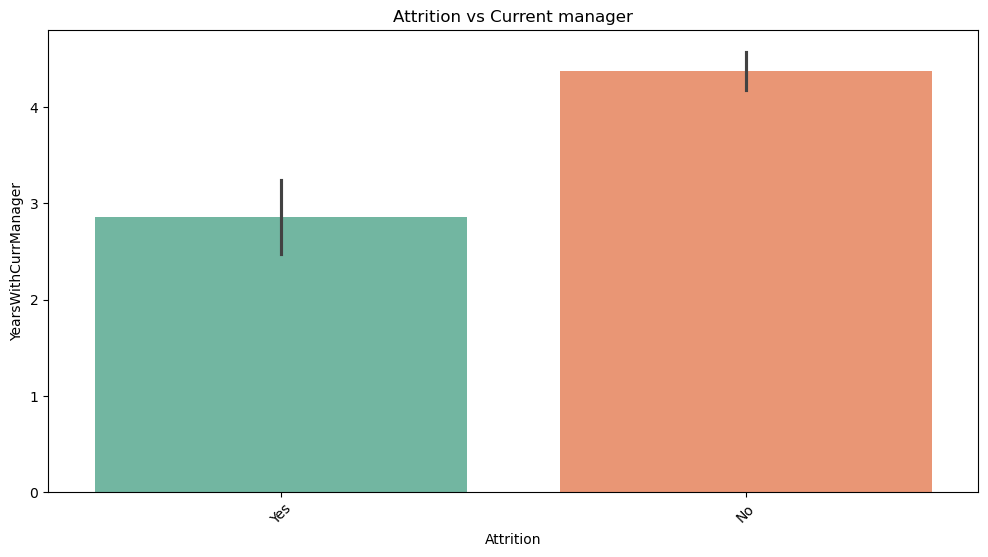

In [111]:
#Attrition vs YearsWithCurrManager
plt.figure(figsize=(12,6))
sns.barplot(y='YearsWithCurrManager', x="Attrition", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Attrition vs Current manager")
plt.show()

In [113]:
# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [115]:
df["Tenure"] = df["Age"] - df["YearsWithCurrManager"]
df["Tenure_JobSatisfaction"] = df["Tenure"] * df["JobSatisfaction"]
df["Age_JobLevel"] = df["Age"] * df["JobLevel"]

In [117]:
# Drop unnecessary columns # multicolinearity columns
df.drop(['EmployeeCount','EmployeeNumber','JobLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','Over18','StandardHours'],axis=1,inplace=True)

In [119]:
x = df.drop(columns='Attrition')
y = df['Attrition']

In [121]:
# Define column types
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome','Education','TrainingTimesLastYear','EnvironmentSatisfaction',
                   'HourlyRate', 'JobInvolvement','YearsWithCurrManager','MonthlyIncome','MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance', 'YearsAtCompany','Tenure_JobSatisfaction','Age_JobLevel','Tenure', 'YearsSinceLastPromotion',]
categorical_cols = ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'OverTime']
ordinal_cols = ['JobSatisfaction', 'PerformanceRating']

In [123]:
### **Step 1: Scale Numerical Columns**
numerical_cols = [col for col in numerical_cols if col in df.columns]
scaler = StandardScaler()
numerical_encoded = scaler.fit_transform(df[numerical_cols])
numerical_encoded_df = pd.DataFrame(numerical_encoded, columns=scaler.get_feature_names_out(numerical_cols))
numerical_encoded_df.head()

,Age,DailyRate,DistanceFromHome,Education,TrainingTimesLastYear,EnvironmentSatisfaction,HourlyRate,JobInvolvement,YearsWithCurrManager,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Tenure_JobSatisfaction,Age_JobLevel,Tenure,YearsSinceLastPromotion
0,0.446350,0.742527,-1.010909,-0.891688,-2.171982,-0.660531,1.383138,0.379672,0.245834,-0.108350,0.726020,2.125136,-1.150554,-1.584178,-0.932014,-2.493820,1.206294,0.010956,0.351265,-0.679146
1,1.322365,-1.297775,-0.147150,-1.868426,0.155707,0.254625,-0.240677,-1.026167,0.806541,-0.291719,1.488876,-0.678049,2.129306,1.191438,0.241988,0.338096,-0.123163,0.284220,1.010027,-0.368715
2,0.008343,1.414363,-0.887515,-0.891688,0.155707,1.169781,1.284725,-1.026167,-1.155935,-0.937654,-1.674841,1.324226,-0.057267,-0.658973,-0.932014,0.338096,0.475092,-0.757598,0.461059,-0.679146
3,-0.429664,1.461466,-0.764121,1.061787,0.155707,1.169781,-0.486709,0.379672,-1.155935,-0.763634,1.243211,-0.678049,-1.150554,0.266233,-0.932014,0.338096,0.209201,-0.825914,0.021884,0.252146
4,-1.086676,-0.524295,-0.887515,-1.868426,0.155707,-1.575686,-1.274014,0.379672,-0.595227,-0.644858,0.325900,2.525591,-0.877232,1.191438,0.241988,0.338096,-0.876522,-0.928388,-0.856465,-0.058285


In [125]:
### **Step 2: Encode Categorical Columns**
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))
categorical_encoded_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [127]:
## **Step 3: Encode Ordinal Columns**
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df[ordinal_cols])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_cols)
ordinal_encoded_df

,JobSatisfaction,PerformanceRating
0,3.0,0.0
1,1.0,1.0
2,2.0,0.0
3,2.0,0.0
4,1.0,0.0
...,...,...
1465,3.0,0.0
1466,0.0,0.0
1467,1.0,1.0
1468,1.0,0.0


In [129]:
x_transformed= pd.concat([numerical_encoded_df, categorical_encoded_df, ordinal_encoded_df], axis=1)

In [131]:
### **Step 6: Save Processed Data to CSV**
final_df = x_transformed.copy()
final_df['Attrition'] = df["Attrition"]# Add target variable back

In [133]:
final_df.dropna(inplace=True)

In [135]:
# Save as CSV
final_csv_path = "processed_employee_data.csv"
final_df.to_csv(final_csv_path, index=False)

print(f"\n✅ Processed data saved to '{final_csv_path}' successfully!")


✅ Processed data saved to 'processed_employee_data.csv' successfully!


In [137]:
final_df.shape

(1470, 42)

In [139]:
final_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'YearsWithCurrManager', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'Tenure_JobSatisfaction', 'Age_JobLevel', 'Tenure',
       'YearsSinceLastPromotion', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'OverTime_No', 'OverTime_Yes'

In [141]:
final_df

,Age,DailyRate,DistanceFromHome,Education,TrainingTimesLastYear,EnvironmentSatisfaction,HourlyRate,JobInvolvement,YearsWithCurrManager,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,JobSatisfaction,PerformanceRating,Attrition
0,0.446350,0.742527,-1.010909,-0.891688,-2.171982,-0.660531,1.383138,0.379672,0.245834,-0.108350,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.155707,0.254625,-0.240677,-1.026167,0.806541,-0.291719,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0
2,0.008343,1.414363,-0.887515,-0.891688,0.155707,1.169781,1.284725,-1.026167,-1.155935,-0.937654,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.155707,1.169781,-0.486709,0.379672,-1.155935,-0.763634,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.155707,-1.575686,-1.274014,0.379672,-0.595227,-0.644858,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.155707,0.254625,-1.224807,1.785511,-0.314873,-0.835451,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0
1466,0.227347,-0.469754,-0.393938,-1.868426,1.707500,1.169781,-1.175601,-1.026167,0.806541,0.741140,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1467,-1.086676,-1.605183,-0.640727,0.085049,-2.171982,-0.660531,1.038693,1.785511,-0.314873,-0.076690,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
1468,1.322365,0.546677,-0.887515,0.085049,0.155707,1.169781,-0.142264,-1.026167,1.086895,-0.236474,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
